# Housing Problem Set

In [2]:
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install pandas


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 2.0 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.8 MB 1.9 MB/s eta 0:00:05
   --------- ------------------------------ 2.4/9.8 MB 2.1 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.1 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.8 MB 2.2 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.3 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.3 MB/s eta 0:00:03
   --------------------- ------------------ 5.

In [3]:
import pandas as pd
import seaborn as sns
import plotly.express as px


In [4]:
# Load the dataset from a CSV file named 'dataset.csv' into a DataFrame called 'housing_df'.
housing_df = pd.read_csv("dataset.csv")
housing_df



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
housing_df['SalePrice']

# Histogram

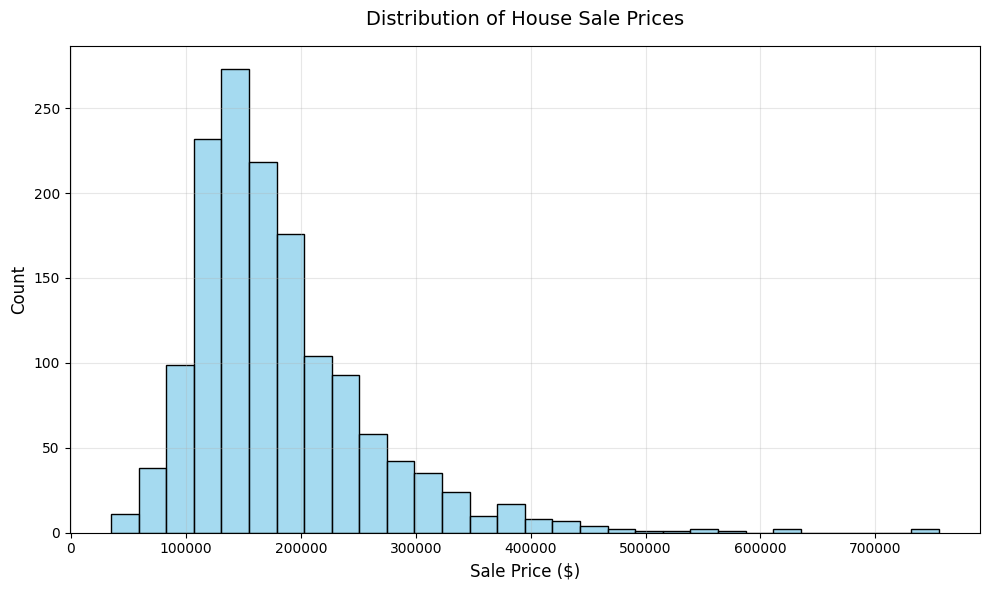

In [7]:
# Create a histogram of the 'SalePrice' column from the housing_df DataFrame.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=housing_df, x='SalePrice', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of House Sale Prices', fontsize=14, pad=15)
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Bar Chart


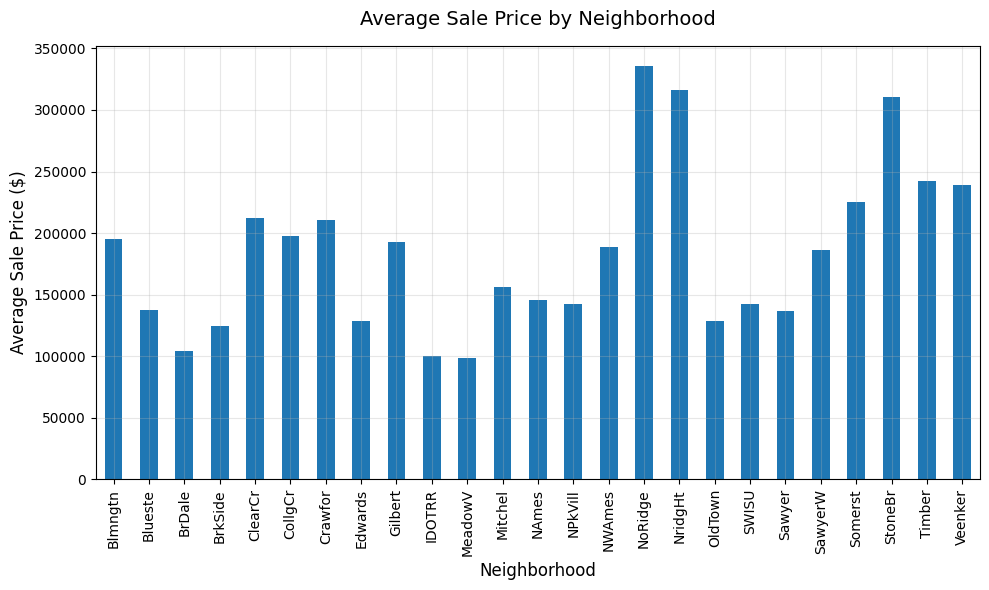

In [8]:
# How to create a bar chart of the average 'SalePrice' for each 'Neighborhood' in the housing_df DataFrame?

housing_df.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Sale Price by Neighborhood', fontsize=14, pad=15)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Sale Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

## Pie Chart

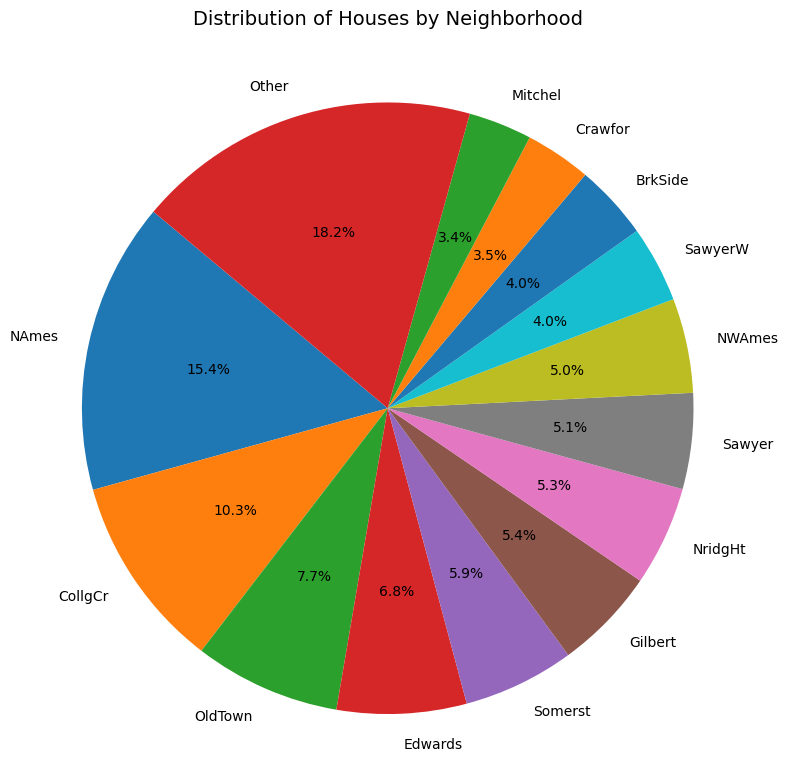

In [12]:
# How to create a pie chart showing the proportion of houses in each 'Neighborhood' in the housing_df DataFrame?

# Combine smaller categories into 'Other' to reduce the number of categories

# Count houses in each neighborhood
neighborhood_counts = housing_df['Neighborhood'].value_counts()

# Set threshold for combining into 'Other' category (e.g., less than 3%)
threshold = len(housing_df) * 0.03
other_mask = neighborhood_counts < threshold

# Create new series with combined small categories
neighborhood_grouped = pd.Series(
    neighborhood_counts[~other_mask].values,
    index=neighborhood_counts[~other_mask].index,
    name=neighborhood_counts.name
)

# Add the 'Other' category
neighborhood_grouped = pd.concat([
    neighborhood_grouped,
    pd.Series({'Other': neighborhood_counts[other_mask].sum()})
])

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(neighborhood_grouped, labels=neighborhood_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Houses by Neighborhood', fontsize=14, pad=15)
plt.axis('equal')
plt.tight_layout()


## Box Plot

<Figure size 1200x800 with 0 Axes>

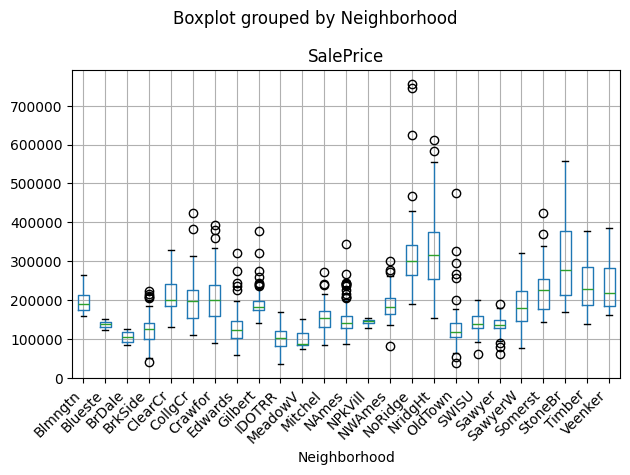

In [14]:
# How to create a boxplot to visualize the distribution of 'SalePrice' in the housing_df DataFrame?

# Create boxplot with rotated x-axis labels for better readability
plt.figure(figsize=(12, 8))
housing_df.boxplot(column='SalePrice', by='Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.title('SalePrice')
plt.tight_layout() # Adjust layout to prevent label cutoff


## Scatter Plot


<Figure size 1200x800 with 0 Axes>

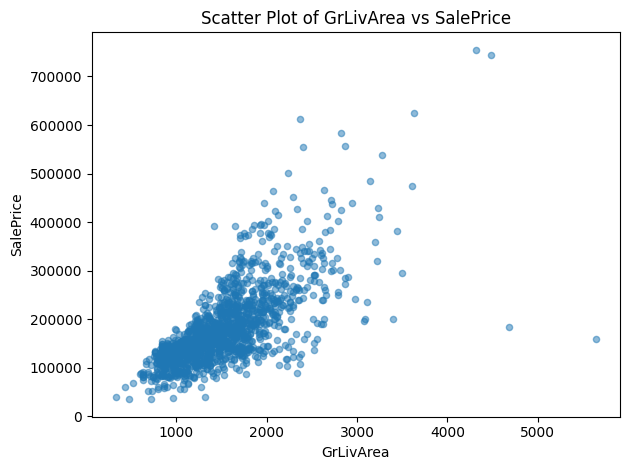

In [15]:
# How to create a scatter plot to visualize the relationship between 'GrLivArea' and 'SalePrice' in the housing_df DataFrame?


plt.figure(figsize=(12, 8))
housing_df.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.5)
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.tight_layout()


C:\Users\nogas\AppData\Local\Temp\ipykernel_20544\1008447165.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])


Text(0, 0.5, 'Sale Price ($)')

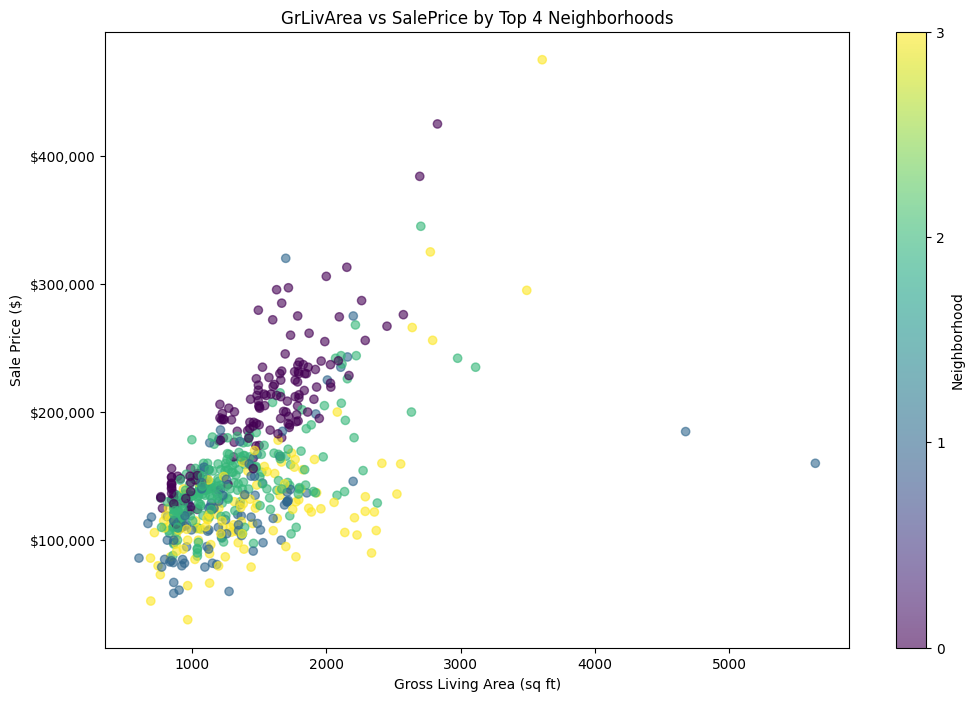

In [16]:
# How to create a scatter plot to visualize the relationship between 'GrLivArea' and 'SalePrice' in the housing_df DataFrame,
# with colors representing fewer 'Neighborhood' categories?
# Filter the DataFrame to include only the top 4 neighborhoods by count

# Get top 4 neighborhoods by count
top_4_neighborhoods = housing_df['Neighborhood'].value_counts().nlargest(4).index

# Filter DataFrame to only include top 4 neighborhoods
filtered_df = housing_df[housing_df['Neighborhood'].isin(top_4_neighborhoods)]

plt.figure(figsize=(12, 8))
plt.scatter(filtered_df['GrLivArea'], filtered_df['SalePrice'], 
           c=filtered_df['Neighborhood'].astype('category').cat.codes,
           alpha=0.6, cmap='viridis')

plt.colorbar(ticks=range(len(top_4_neighborhoods)), 
            label='Neighborhood')
plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])

plt.title('GrLivArea vs SalePrice by Top 4 Neighborhoods')
plt.xlabel('Gross Living Area (sq ft)')
plt.ylabel('Sale Price ($)')



C:\Users\nogas\AppData\Local\Temp\ipykernel_20544\2594458236.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])


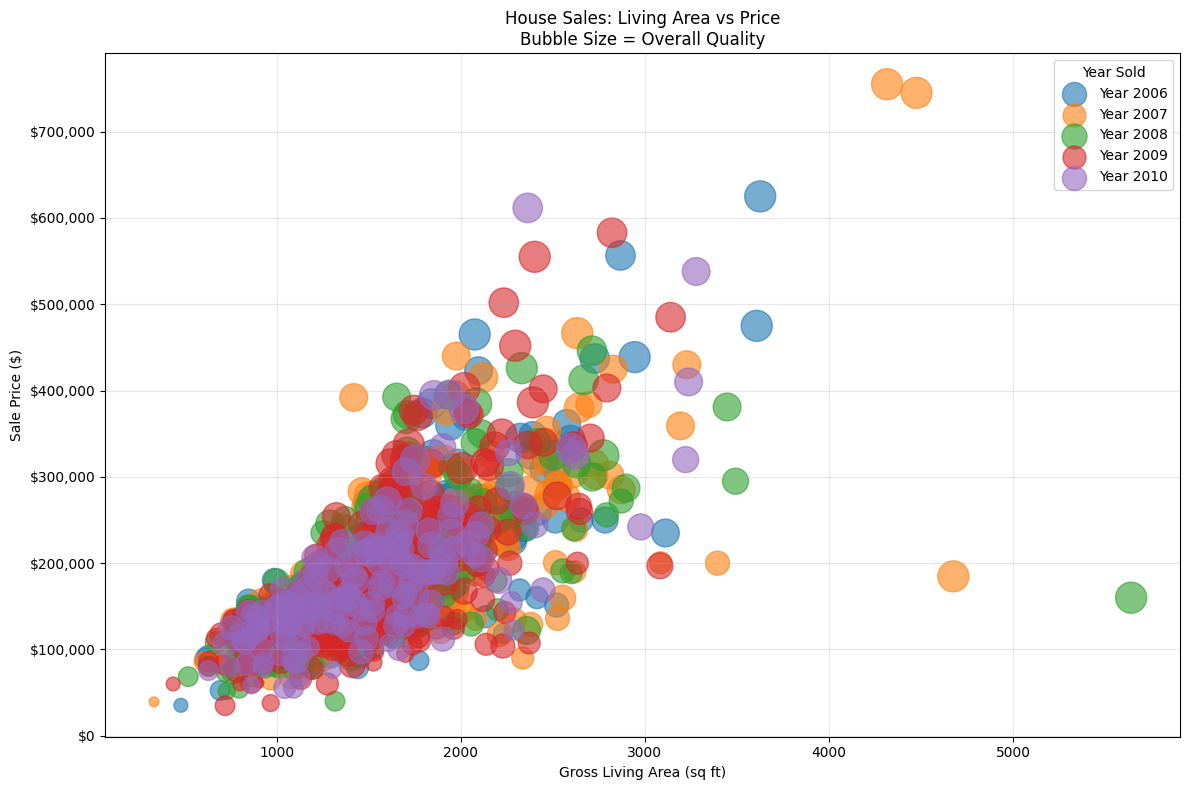

In [17]:

# Dynamic Bubble Chart: Create an interactive bubble chart to visualize the relationship between 'GrLivArea', 'SalePrice', and 'OverallQual' in the housing_df DataFrame.
# The size of the bubbles should represent 'OverallQual'. Add dynamic interaction for 'YrSold'.

# Create figure and axis
plt.figure(figsize=(12, 8))

# Create bubble chart for each year
for year in sorted(housing_df['YrSold'].unique()):
    # Filter data for current year
    year_data = housing_df[housing_df['YrSold'] == year]
    
    # Create scatter plot with size proportional to OverallQual
    plt.scatter(year_data['GrLivArea'], 
               year_data['SalePrice'],
               s=year_data['OverallQual']*50, # Scale bubble size
               alpha=0.6,
               label=f'Year {year}')

# Customize plot
plt.title('House Sales: Living Area vs Price\nBubble Size = Overall Quality')
plt.xlabel('Gross Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

# Format y-axis labels as currency
plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])

# Add legend
plt.legend(title='Year Sold')

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()


## Box Plot

C:\Users\nogas\AppData\Local\Temp\ipykernel_20544\3674865037.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])



Neighborhood Summary Statistics:
                median       mean        std
Neighborhood                                
NridgHt       315000.0  316270.62   96392.54
NoRidge       301500.0  335295.32  121412.66
StoneBr       278000.0  310499.00  112969.68
Timber        228475.0  242247.45   64845.65
Somerst       225500.0  225379.84   56177.56
Veenker       218000.0  238772.73   72369.32
Crawfor       200624.0  210624.73   68866.40
ClearCr       200250.0  212565.43   50231.54
CollgCr       197200.0  197965.77   51403.67
Blmngtn       191000.0  194870.88   30393.23
NWAmes        182900.0  189050.07   37172.22
Gilbert       181000.0  192854.51   35986.78
SawyerW       179900.0  186555.80   55652.00
Mitchel       153500.0  156270.12   36486.63
NPkVill       146000.0  142694.44    9377.31
NAmes         140000.0  145847.08   33075.35
SWISU         139500.0  142591.36   32622.92
Blueste       137500.0  137500.00   19091.88
Sawyer        135000.0  136793.14   22345.13
BrkSide       124300.

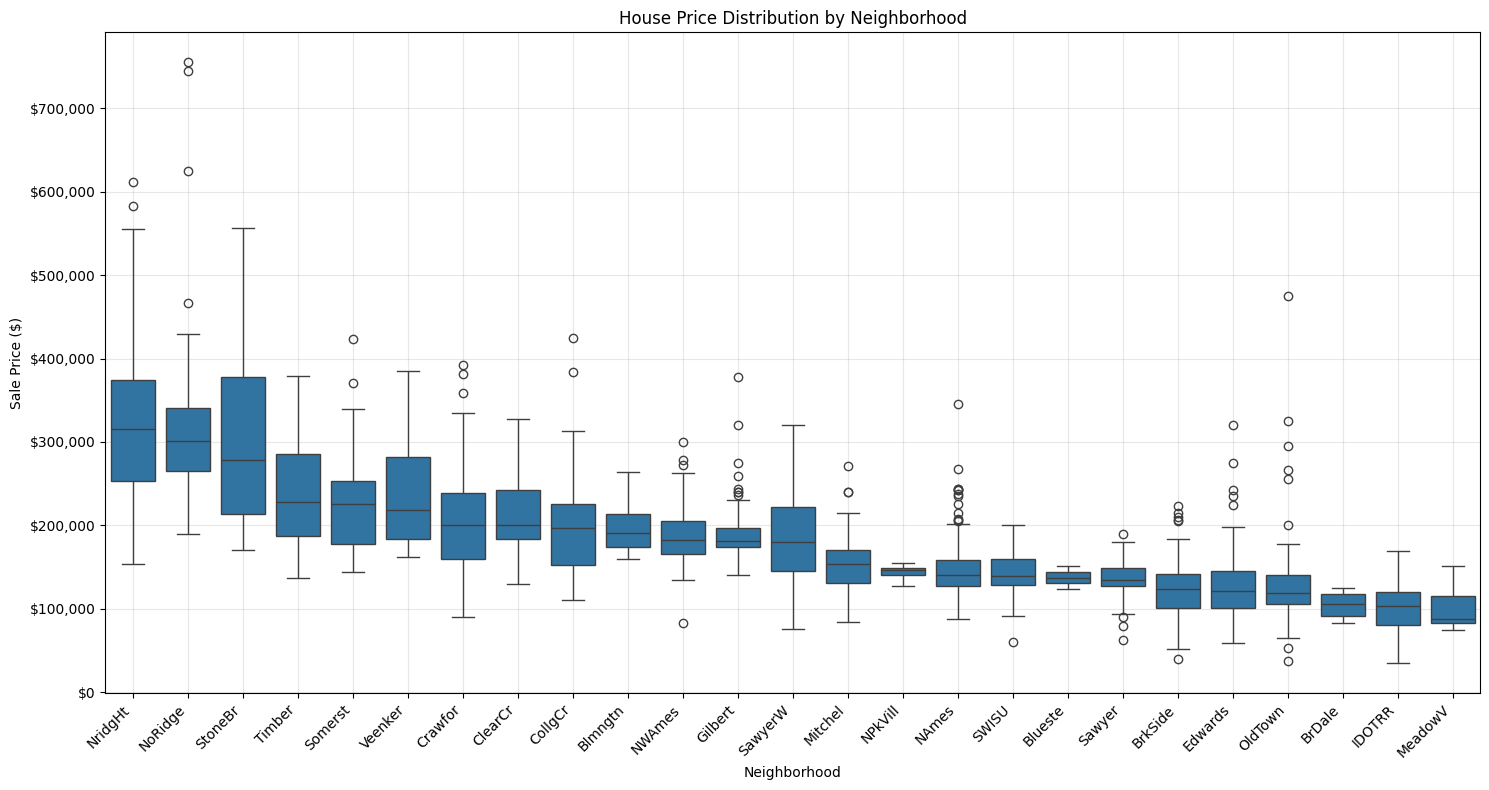

In [18]:
# How can you create a box plot to visualize the distribution of 'SalePrice' across different 'Neighborhood' categories?
# Calculate the median SalePrice for each Neighborhood

# Calculate summary statistics by neighborhood
neighborhood_stats = housing_df.groupby('Neighborhood')['SalePrice'].agg(['median', 'mean', 'std']).round(2)
neighborhood_stats = neighborhood_stats.sort_values('median', ascending=False)

# Create figure with larger size for better readability
plt.figure(figsize=(15, 8))

# Create box plot
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing_df, order=neighborhood_stats.index)

# Customize plot
plt.title('House Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price ($)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y-axis labels as currency
plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Display summary statistics
print("\nNeighborhood Summary Statistics:")
print(neighborhood_stats)


## Grouped Bar Chart

C:\Users\nogas\AppData\Local\Temp\ipykernel_20544\3417231052.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])


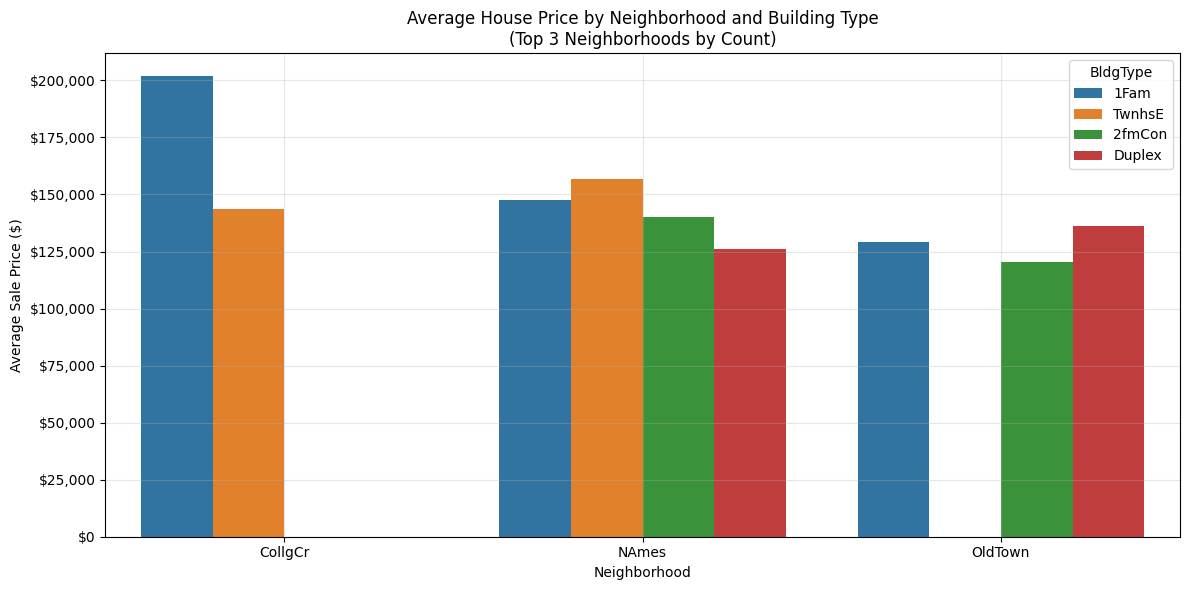

In [19]:

# How can you create a grouped bar chart to compare the average 'SalePrice' across fewer 'Neighborhood' categories for each 'BldgType'?
# Filter the DataFrame to include only the top 3 neighborhoods by count


# Get top 3 neighborhoods by count
top_3_neighborhoods = housing_df['Neighborhood'].value_counts().nlargest(3).index

# Filter data for top 3 neighborhoods
filtered_df = housing_df[housing_df['Neighborhood'].isin(top_3_neighborhoods)]

# Calculate mean sale price for each neighborhood-building type combination
grouped_data = filtered_df.groupby(['Neighborhood', 'BldgType'])['SalePrice'].mean().reset_index()

# Create figure with larger size
plt.figure(figsize=(12, 6))

# Create grouped bar chart
sns.barplot(x='Neighborhood', y='SalePrice', hue='BldgType', data=grouped_data)

# Customize plot
plt.title('Average House Price by Neighborhood and Building Type\n(Top 3 Neighborhoods by Count)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price ($)')

# Format y-axis labels as currency
plt.gca().set_yticklabels([f'${x:,.0f}' for x in plt.gca().get_yticks()])

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.tight_layout()



## Line Chart

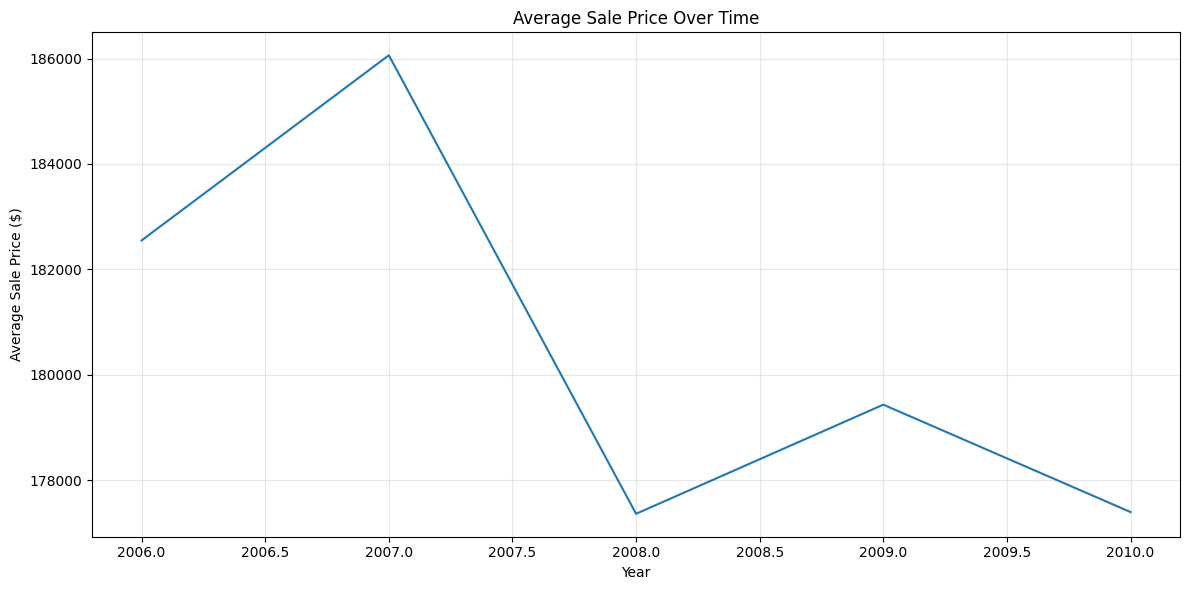

In [20]:
# Example: Create a line chart to visualize the average 'SalePrice' over time

plt.figure(figsize=(12, 6))
housing_df.groupby('YrSold')['SalePrice'].mean().plot(kind='line')
plt.title('Average Sale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sale Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

